# EDA Airbnb de Nueva York

In [1]:
import pandas as pd

In [21]:
conjunto_datos = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv")
conjunto_datos.to_csv("../data/raw/conjunto_datos.csv", index= False)


In [3]:
conjunto_datos.info()

<class 'pandas.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  str    
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  str    
 4   neighbourhood_group             48895 non-null  str    
 5   neighbourhood                   48895 non-null  str    
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  str    
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     38843 non-n

Desde este primer analisis podemos observar que a las columnas last_review y reviews_per_month tienen mas de 10 mil datos faltantes cada una
10 columnas con variables Numericas sin embargo 2 son Ids
8 columnas con variables Categoricas

#### Eliminamos Duplicados

In [4]:
print(f"Duplicados de la columna ID: {conjunto_datos['id'].duplicated().sum()}")
print(f"Duplicados de la columna Host ID: {conjunto_datos['host_id'].duplicated().sum()}")

Duplicados de la columna ID: 0
Duplicados de la columna Host ID: 11438


La columna ID muestra que no hay registros duplicados, y en la columna Host ID puede haber duplicados debido a que un dueño puede ofertar varios hospedajes registrados

#### Eliminar información irrelevante

In [22]:
conjunto_datos.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
conjunto_datos.info()

<class 'pandas.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  str    
 2   neighbourhood                   48895 non-null  str    
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  str    
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), str(3)
memory usage: 4.1 MB


Ahora que ya revisamos y eliminamos la informacion irrelevante, vamos a iniciar con el analisis de variables univariante

## Análisis de variables univariante
Análisis sobre variables categóricas

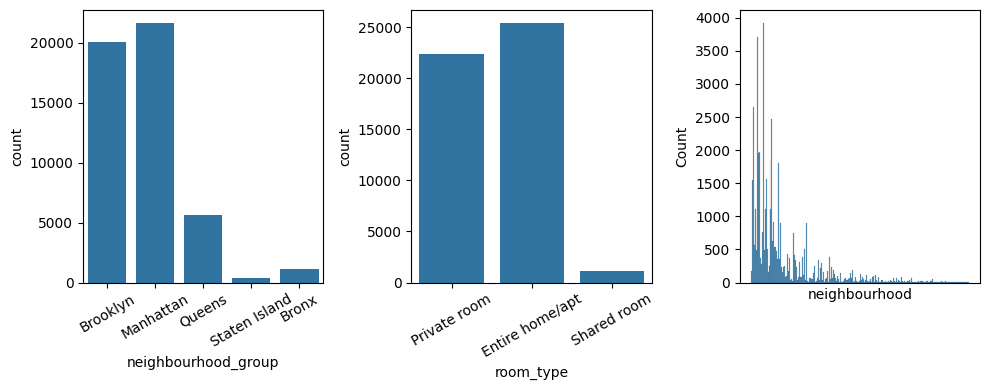

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(10, 4))

sns.countplot(data=conjunto_datos, x="neighbourhood_group", ax=axis[0])
axis[0].tick_params(axis="x", rotation=30)
sns.countplot(data=conjunto_datos, x="room_type", ax=axis[1])
axis[1].tick_params(axis="x", rotation=30)
sns.histplot(ax = axis[2], data = conjunto_datos, x = "neighbourhood").set_xticks([])

plt.tight_layout()
plt.show()

## Análisis sobre variables numéricas

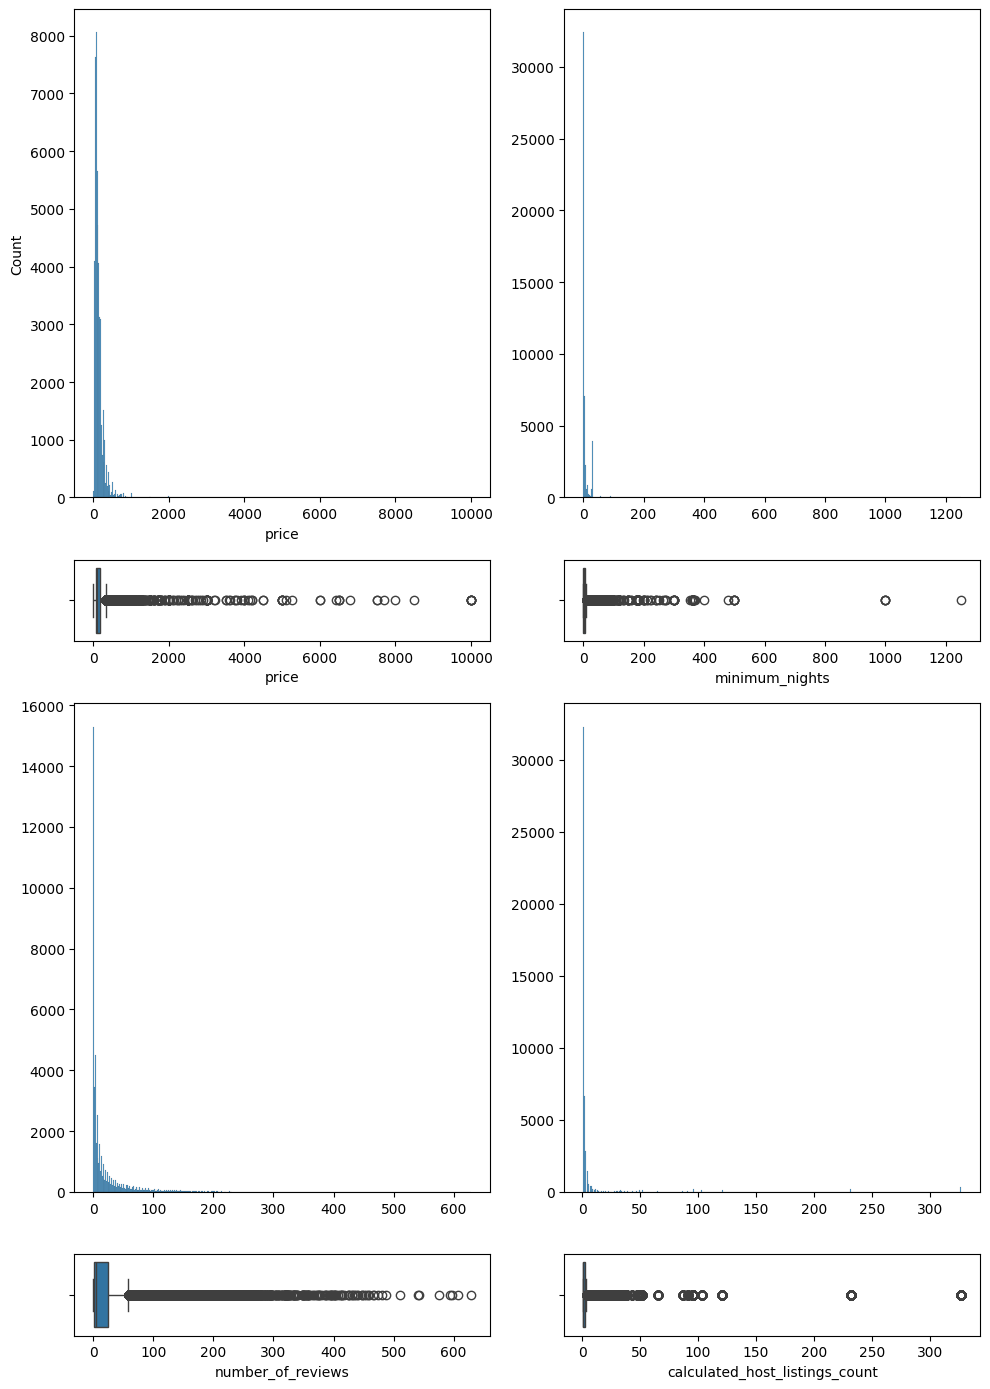

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = conjunto_datos, x = "price")
sns.boxplot(ax = axis[1, 0], data = conjunto_datos, x = "price")
sns.histplot(ax = axis[0, 1], data = conjunto_datos, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = conjunto_datos, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = conjunto_datos, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = conjunto_datos, x = "number_of_reviews")
sns.histplot(ax = axis[2, 1], data = conjunto_datos, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = conjunto_datos, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()

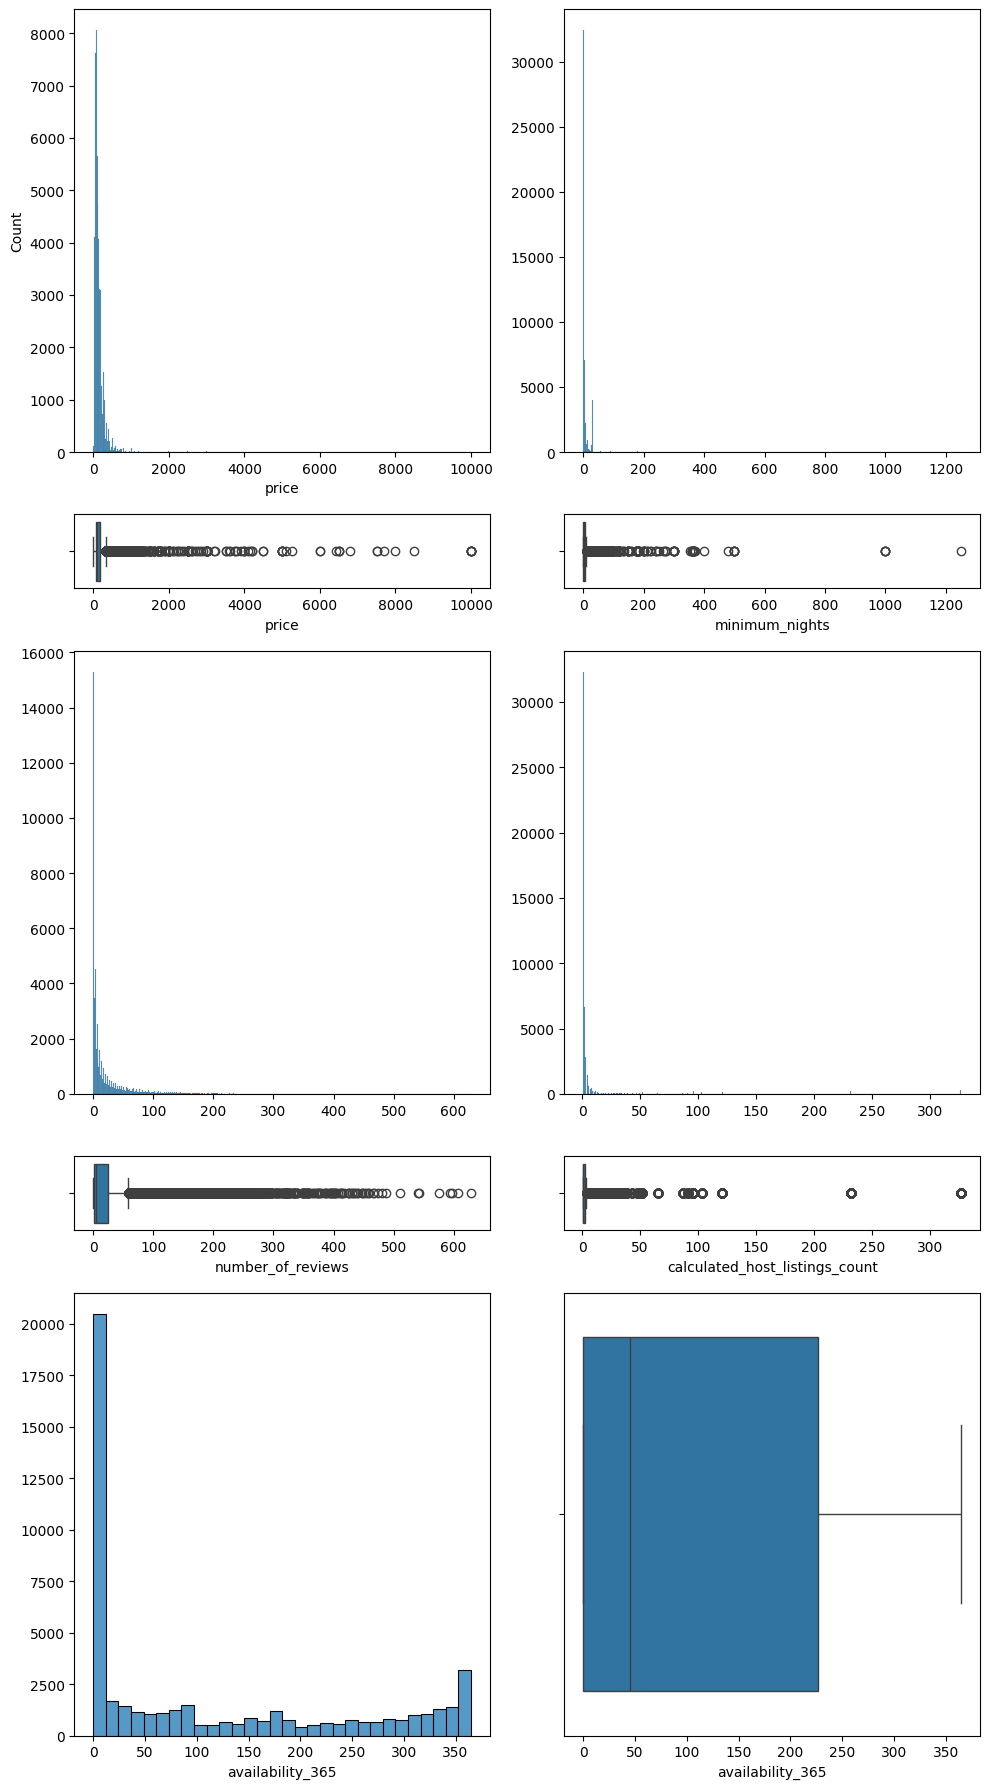

In [13]:
fig, axis = plt.subplots(5, 2, figsize = (10, 18), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6]})

sns.histplot(ax = axis[0, 0], data = conjunto_datos, x = "price")
sns.boxplot(ax = axis[1, 0], data = conjunto_datos, x = "price")

sns.histplot(ax = axis[0, 1], data = conjunto_datos, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = conjunto_datos, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = conjunto_datos, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = conjunto_datos, x = "number_of_reviews")

sns.histplot(ax = axis[2, 1], data = conjunto_datos, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = conjunto_datos, x = "calculated_host_listings_count")

sns.histplot(ax = axis[4, 0], data = conjunto_datos, x = "availability_365").set(ylabel = None)
sns.boxplot(ax = axis[4, 1], data = conjunto_datos, x = "availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## Análisis de variables multivariante

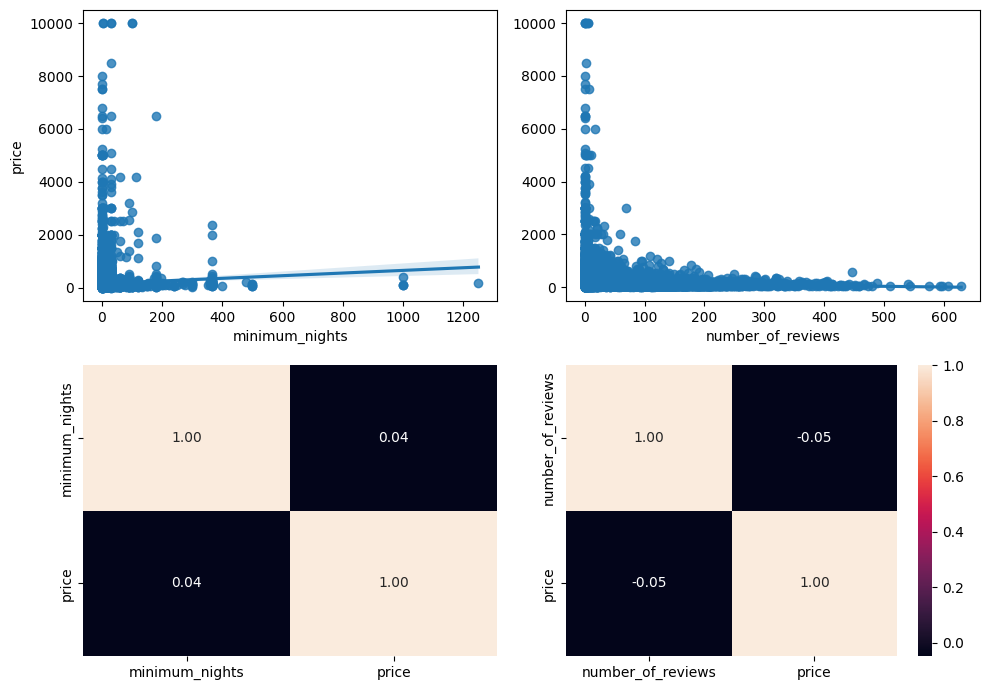

In [14]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = conjunto_datos, x = "minimum_nights", y = "price")
sns.heatmap(conjunto_datos[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = conjunto_datos, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(conjunto_datos[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Relación entre variables categóricas y precio

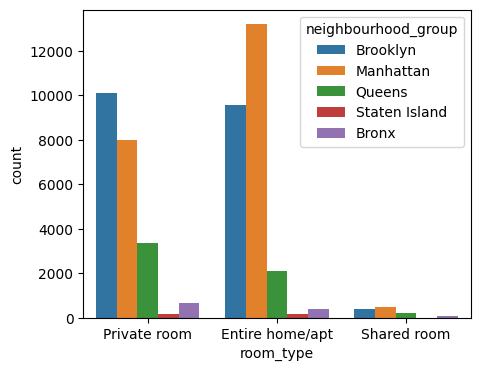

In [17]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = conjunto_datos, x = "room_type", hue = "neighbourhood_group")

plt.show()

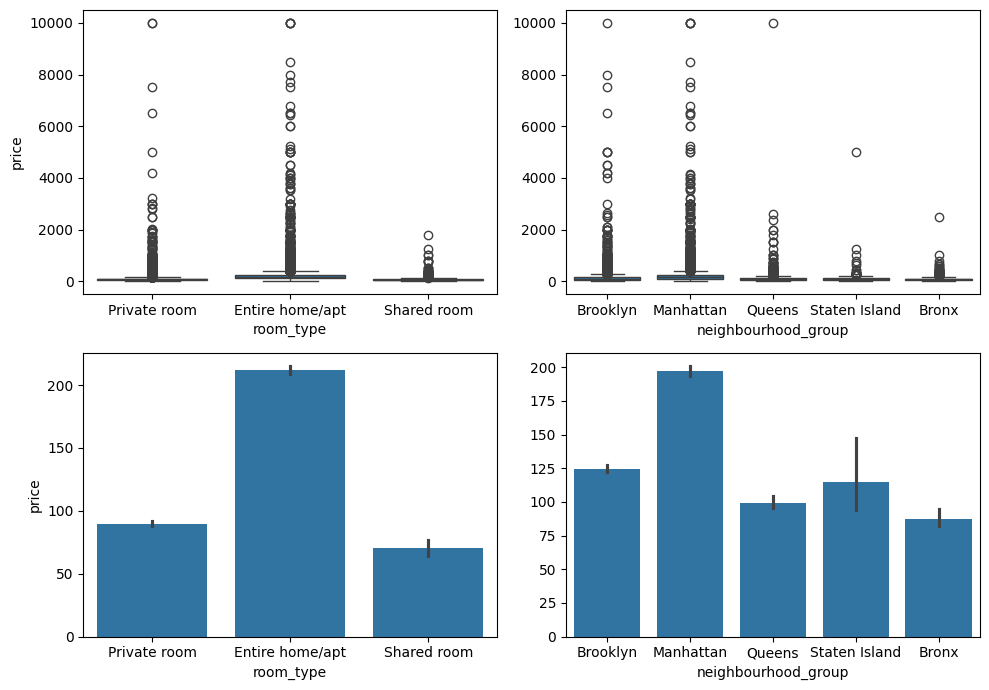

In [16]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# PRICE vs ROOM TYPE
sns.boxplot(data=conjunto_datos,x="room_type",y="price",ax=axis[0, 0])

sns.barplot(data=conjunto_datos,x="room_type",y="price", estimator="mean", ax=axis[1, 0])

# PRICE vs NEIGHBOURHOOD GROUP
sns.boxplot(data=conjunto_datos, x="neighbourhood_group", y="price", ax=axis[0, 1])
axis[0, 1].set_ylabel(None)

sns.barplot(data=conjunto_datos, x="neighbourhood_group", y="price", estimator="mean", ax=axis[1, 1])
axis[1, 1].set_ylabel(None)

plt.tight_layout()
plt.show()

A partir del análisis de las variables categóricas, se observa que Manhattan concentra la mayor cantidad de alojamientos disponibles en Airbnb, destacando principalmente la oferta de alojamientos completos. Brooklyn representa el segundo grupo con mayor número de publicaciones, donde predominan las habitaciones privadas, lo que sugiere una mayor presencia de alojamientos compartidos. Queens y el Bronx presentan un comportamiento similar al de Brooklyn, aunque con un menor volumen de anuncios. Staten Island muestra una participación muy reducida, indicando una baja presencia de la plataforma en esta zona.

En general, aunque algunos tipos de alojamiento son más frecuentes en determinados vecindarios, la distribución de los tipos de habitación es relativamente similar entre las distintas zonas, por lo que no se identifica una relación categórica fuerte entre el tipo de habitación y el grupo de vecindarios.

## Análisis numérico-categórico (completo) 
En esta sección combinamos dos estrategias:
Correlación únicamente entre variables numéricas (Pearson), para ver relaciones lineales entre continuas. Relación numérico–categórico mediante tasas/boxplots, sin usar Pearson con dummies.

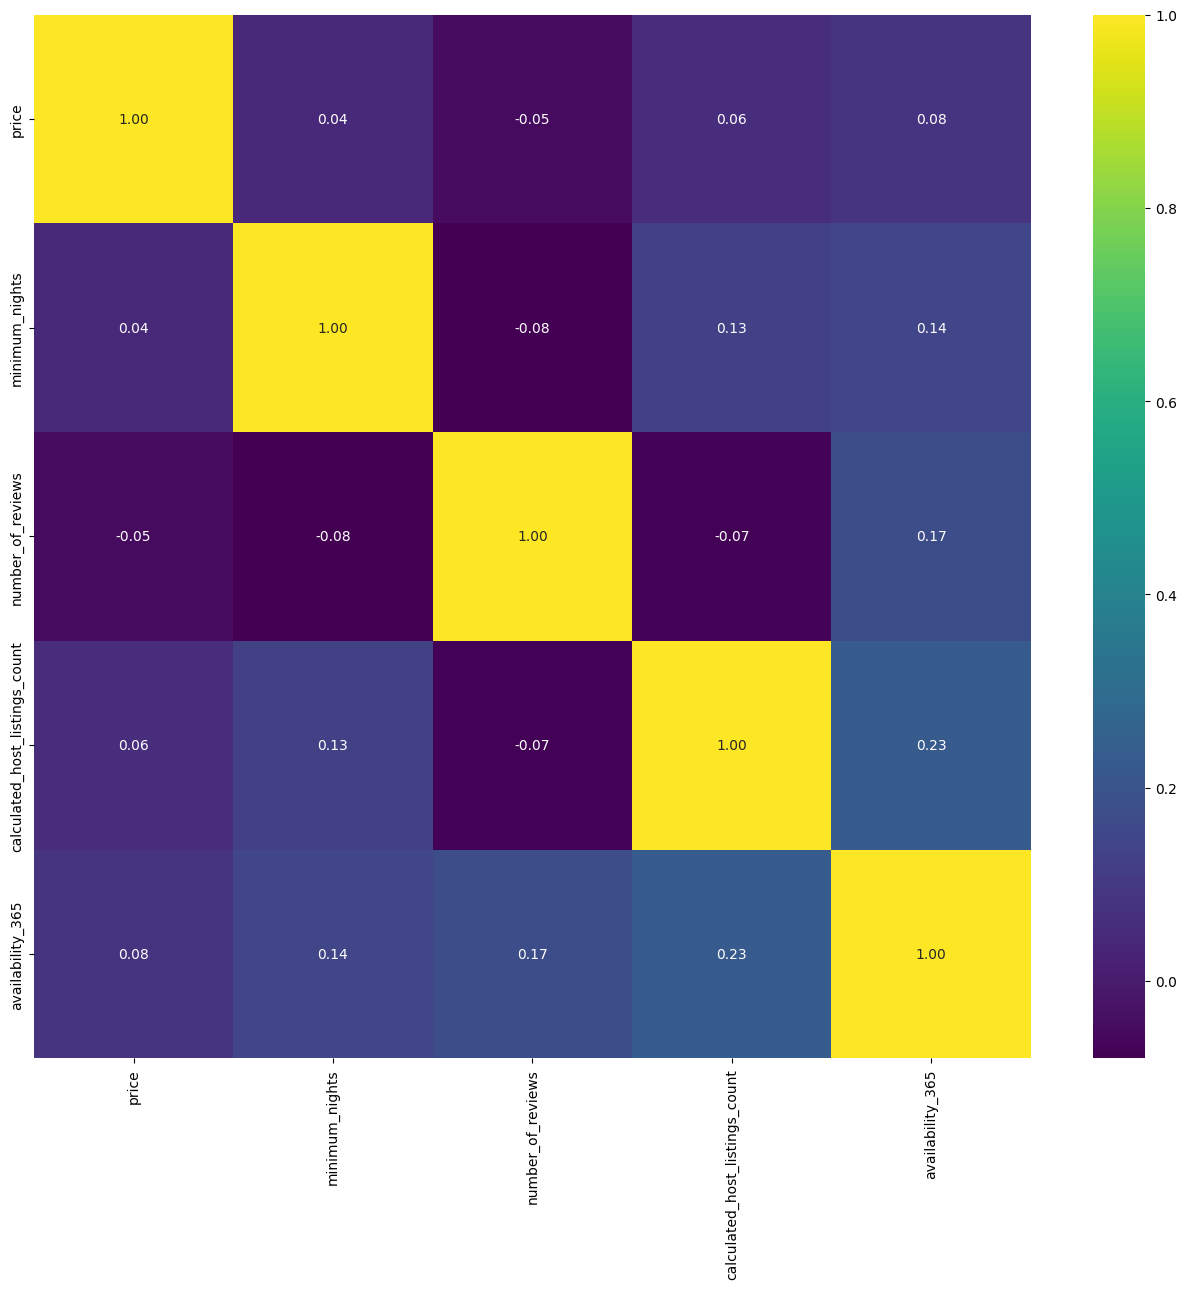

In [27]:
num_cols = conjunto_datos.select_dtypes(include=["int64", "float64"]).columns

num_cols = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "calculated_host_listings_count",
    "availability_365"
]

fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(
    conjunto_datos[num_cols].corr(method="pearson"),
    annot=True,
    fmt=".2f",
    cmap="viridis",
    ax=ax
)

plt.tight_layout()
plt.show()

## Ingeniería de características

In [28]:
conjunto_datos.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


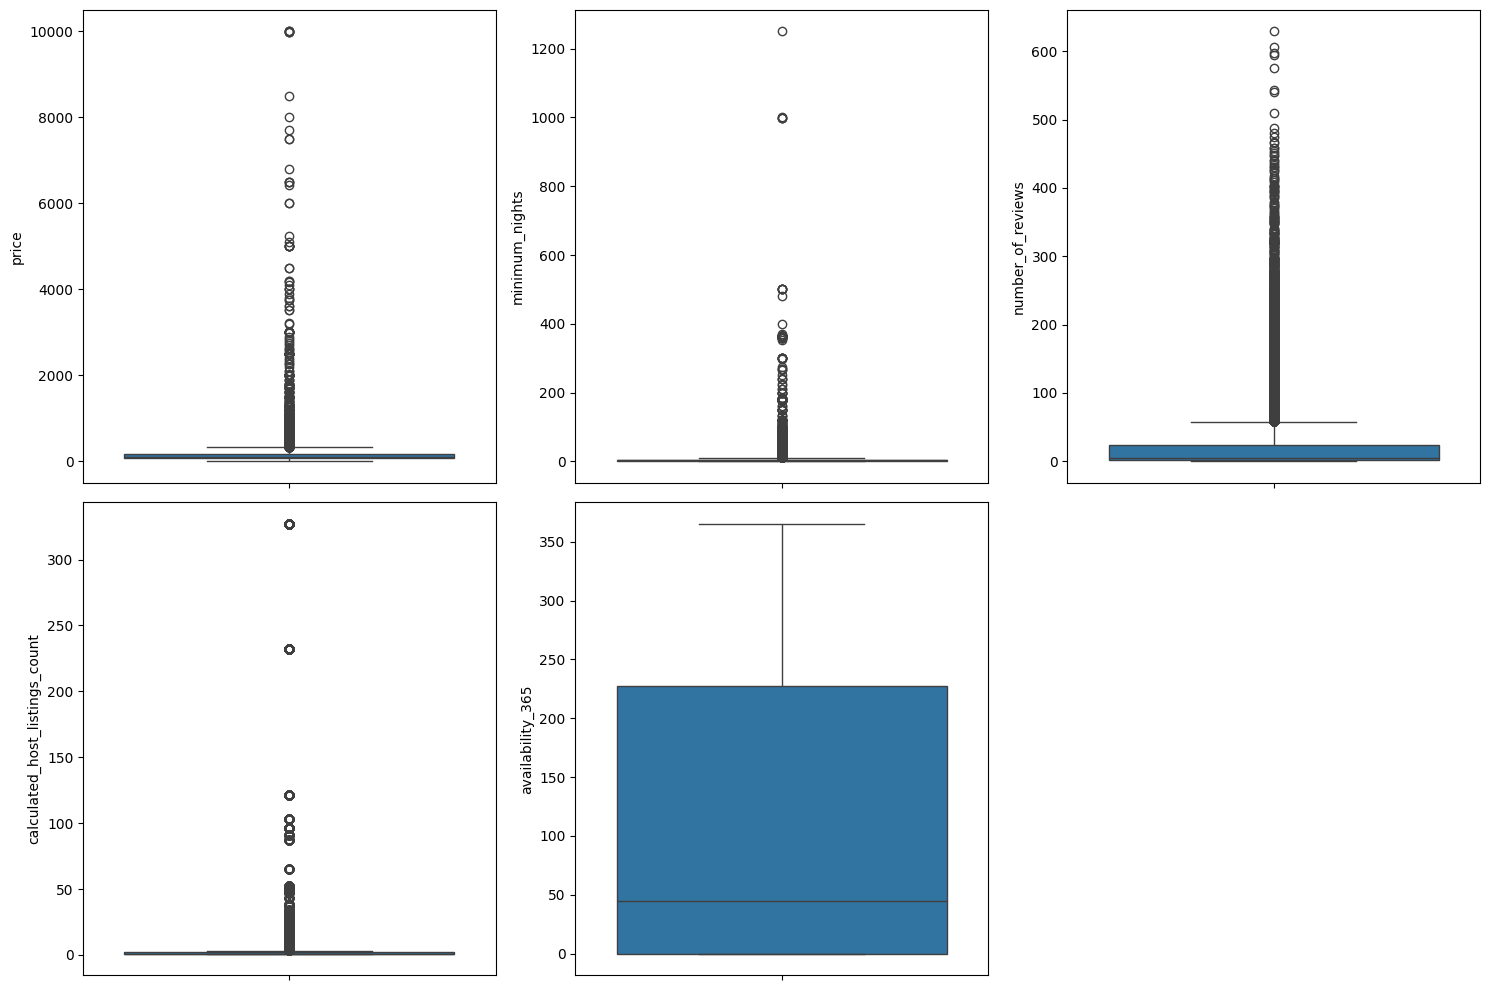

In [30]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = conjunto_datos, y = "price")
sns.boxplot(ax = axis[0, 1], data = conjunto_datos, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = conjunto_datos, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = conjunto_datos, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 1], data = conjunto_datos, y = "availability_365")

axis[1, 2].axis("off")

plt.tight_layout()
plt.show()

Detección de valores atípicos para "price"

In [31]:
price_stats = conjunto_datos["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [38]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"El IQR calculado es {round(price_iqr, 2)}, lo que define un límite inferior de {round(lower_limit, 2)} "
    f"y un límite superior de {round(upper_limit, 2)} para la detección de outliers.")

El IQR calculado es 106.0, lo que define un límite inferior de -90.0 y un límite superior de 334.0 para la detección de outliers.


In [33]:
conjunto_datos = conjunto_datos[conjunto_datos["price"] > 0]

In [34]:
nights_stats = conjunto_datos["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [39]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]
upper_limit= nights_stats["75%"] + 1.5 * nights_iqr
lower_limit= nights_stats["25%"] - 1.5 * nights_iqr

print(f"El rango intercuartílico para 'minimum_nights' es {round(nights_iqr, 2)}, "
    f"lo que establece un límite inferior de {round(lower_limit, 2)} y uno superior de "
    f"{round(upper_limit, 2)} para detectar valores atípicos.")

El rango intercuartílico para 'minimum_nights' es 4.0, lo que establece un límite inferior de -5.0 y uno superior de 11.0 para detectar valores atípicos.


In [40]:
conjunto_datos = conjunto_datos[conjunto_datos["minimum_nights"] <= 15]

In [42]:
count_0 = conjunto_datos[conjunto_datos["minimum_nights"] == 0].shape[0]
count_1 = conjunto_datos[conjunto_datos["minimum_nights"] == 1].shape[0]
count_2 = conjunto_datos[conjunto_datos["minimum_nights"] == 2].shape[0]
count_3 = conjunto_datos[conjunto_datos["minimum_nights"] == 3].shape[0]
count_4 = conjunto_datos[conjunto_datos["minimum_nights"] == 4].shape[0]


print(f"Número de anuncios con mínimo de noches igual a 0: {count_0}")
print(f"Número de anuncios con mínimo de noches igual a 1: {count_1}")
print(f"Número de anuncios con mínimo de noches igual a 2: {count_2}")
print(f"Número de anuncios con mínimo de noches igual a 3: {count_3}")
print(f"Número de anuncios con mínimo de noches igual a 4: {count_4}")

Número de anuncios con mínimo de noches igual a 0: 0
Número de anuncios con mínimo de noches igual a 1: 12717
Número de anuncios con mínimo de noches igual a 2: 11693
Número de anuncios con mínimo de noches igual a 3: 7998
Número de anuncios con mínimo de noches igual a 4: 3302


Detección de valores atípicos para number_of_reviews

In [43]:
review_stats = conjunto_datos["number_of_reviews"].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [44]:
review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(
    f"Según el rango intercuartílico, los valores fuera del intervalo "
    f"{round(lower_limit, 2)} a {round(upper_limit, 2)} se consideran posibles outliers. "
    f"El IQR calculado para la variable es {round(review_iqr, 2)}."
)

Según el rango intercuartílico, los valores fuera del intervalo -38.0 a 66.0 se consideran posibles outliers. El IQR calculado para la variable es 26.0.


Detección de valores atípicos para calculated_host_listings_count

In [45]:
hostlist_stats = conjunto_datos["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [48]:
hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"Con base en el rango intercuartílico, los valores de "
    f"'calculated_host_listings_count' que se encuentran fuera del intervalo "
    f"{round(lower_limit, 2)} a {round(upper_limit, 2)} se consideran posibles valores atípicos."
    f"El IQR obtenido para esta variable es {round(hostlist_iqr, 2)}.")

Con base en el rango intercuartílico, los valores de 'calculated_host_listings_count' que se encuentran fuera del intervalo -0.5 a 3.5 se consideran posibles valores atípicos.El IQR obtenido para esta variable es 1.0.


In [50]:
count_04 = sum(1 for x in conjunto_datos["calculated_host_listings_count"] if x in range(0, 5))
count_1 = conjunto_datos[conjunto_datos["calculated_host_listings_count"] == 1].shape[0]
count_2 = conjunto_datos[conjunto_datos["calculated_host_listings_count"] == 2].shape[0]

print(f"Número de anuncios con entre 0 y 4 publicaciones por anfitrión: {count_04}")
print(f"Número de anfitriones con exactamente 1 anuncio: {count_1}")
print(f"Número de anfitriones con exactamente 2 anuncios: {count_2}")

Número de anuncios con entre 0 y 4 publicaciones por anfitrión: 40308
Número de anfitriones con exactamente 1 anuncio: 30253
Número de anfitriones con exactamente 2 anuncios: 6179


In [51]:
conjunto_datos.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Escalado de valores

In [52]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

num_variables = [
    "number_of_reviews",
    "minimum_nights",
    "calculated_host_listings_count",
    "availability_365"
]

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(conjunto_datos[num_variables])

df_scal = pd.DataFrame(
    scaled_features,
    index=conjunto_datos.index,
    columns=num_variables
)

# Conservamos el precio sin escalar
df_scal["price"] = conjunto_datos["price"]

df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,price
0,0.014308,0.000000,0.015337,1.000000,149
1,0.071542,0.000000,0.003067,0.972603,225
2,0.000000,0.142857,0.000000,1.000000,150
3,0.429253,0.000000,0.000000,0.531507,89
4,0.014308,0.642857,0.000000,0.000000,80


## Selección de características

In [55]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis=1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selection_model = SelectKBest(score_func=f_regression, k=4)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[ix], index=X_train.index)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_train.columns[ix], index=X_test.index)

X_train_sel.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365
42032,0.030207,0.000000,0.000000,0.569863
32759,0.019078,0.428571,0.141104,0.969863
27831,0.020668,0.000000,0.000000,0.504110
43410,0.023847,0.285714,0.000000,0.400000
37689,0.025437,0.071429,0.000000,0.756164


In [56]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)